In [1]:
start_index = 1
datasets = "cifar10_original"
from rac.experiment_data import ExperimentReader
exp_reader = ExperimentReader(["rand"])
config = {
    "general_options": {
        "experiment_name": "predicting_exp",
        "num_repeats": 10,
        "n_workers": 5,
        "local": True,
        "verbose": False
    },
    "experiment_options": {
        "seed": 33,
        "num_feedback": 0.01,
        "noise_level": [0.0, 0.2, 0.4],
        "persistent_noise_level": 0.0,
        "force_global_update": True,
        "save_matrix_data": False,
        "infer_sims": False,
        "predict_sims": [True],
        "base_net": "cifarnet",
        "siamese": True,
        "criterion": "bce"
    },
    "sim_init_options": {
        "K_init": [20],
        "sim_init": [0.1],
        "sim_init_type": ["random_clustering"]
    },
    "query_strategy_options": {
        "acq_fn": ["freq"],
        "local_regions": "pairs",
        "eps": [0.3],
        "beta": 1,
        "tau": [7],
        "alpha": 1
    },
    "dataset_options": {
        "dataset": datasets,
    }
}

start_index = exp_reader.generate_experiments(
    folder="../configs/predicting_exp/", 
    options_to_keep=[],
    start_index=start_index,
    **config
)

In [2]:
datasets = "cifar10_original"
from rac.experiment_data import ExperimentReader
exp_reader = ExperimentReader(["rand"])
config = {
    "general_options": {
        "experiment_name": "predicting_exp",
        "num_repeats": 10,
        "n_workers": 10,
        "local": True,
        "verbose": False
    },
    "experiment_options": {
        "seed": 33,
        "num_feedback": 0.01,
        "noise_level": [0.0, 0.2, 0.4],
        "persistent_noise_level": 0.0,
        "force_global_update": True,
        "save_matrix_data": False,
        "infer_sims": False,
        "predict_sims": [False],
        "base_net": "cifarnet",
        "siamese": True,
        "criterion": "bce"
    },
    "sim_init_options": {
        "K_init": [20],
        "sim_init": [0.1],
        "sim_init_type": ["random_clustering"]
    },
    "query_strategy_options": {
        "acq_fn": ["freq"],
        "local_regions": "pairs",
        "eps": [0.3],
        "beta": 1,
        "tau": [7],
        "alpha": 1
    },
    "dataset_options": {
        "dataset": datasets,
    }
}

start_index = exp_reader.generate_experiments(
    folder="../configs/predicting_exp/", 
    options_to_keep=[],
    start_index=start_index,
    **config
)

In [1]:
from rac.experiment_data import ExperimentReader
metrics = ["rand", "ami"]
ac = ExperimentReader(metrics=metrics)
datasets = "cifar10_original"
config = {
    "general_options": {
        "experiment_name": "predicting_exp",
        "num_repeats": 5,
        "n_workers": 1,
        "local": True,
        "verbose": False
    },
    "experiment_options": {
        "seed": 33,
        "num_feedback": 0.001,
        "noise_level": [0.0, 0.4, 0.6],
        "persistent_noise_level": 0.0,
        "force_global_update": True,
        "save_matrix_data": False,
        "infer_sims": False,
        "predict_sims": [False, True]
    },
    "sim_init_options": {
        "K_init": [20],
        "sim_init": [0.1],
        "sim_init_type": ["random_clustering"]
    },
    "query_strategy_options": {
        "acq_fn": ["freq"],
        "local_regions": "pairs",
        "eps": [0.3],
        "beta": 1,
        "tau": [7],
        "alpha": 1
    },
    "dataset_options": {
        "dataset": datasets,
    }
}

data = ac.read_all_data(folder="../experiment_results_local/predicting_exp")
ac.generate_AL_curves(
    data,
    save_location="../plots/predicting_exp",
    categorize=["dataset", "noise_level"],
    compare=["acq_fn", "local_regions", "predict_sims"], 
    vary=["x"],
    auc=True,
    summary_method="auc_max_ind",
    indices=[], 
    threshold=1,
    err_style="band",
    marker="o",
    markersize=6,
    capsize=6,
    linestyle="solid",
    **config
)

c:\github_projects\robust-active-clustering\rac\experiment_data.py:571: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:571: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:571: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:571: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:571: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:571: UserWarning: FixedFormatter should only be used 

<Figure size 1200x1200 with 0 Axes>

In [2]:
from sklearn import datasets, metrics
from active_semi_clustering.semi_supervised.pairwise_constraints import PCKMeans
from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax

In [3]:
X, y = datasets.load_iris(return_X_y=True)

In [4]:
# TODO implement your own oracle that will, for example, query a domain expert via GUI or CLI
oracle = ExampleOracle(y, max_queries_cnt=10)

active_learner = MinMax(n_clusters=3)
active_learner.fit(X, oracle=oracle)
pairwise_constraints = active_learner.pairwise_constraints_

In [9]:
pairwise_constraints[1]

[(37, 118),
 (37, 106),
 (37, 100),
 (37, 50),
 (37, 98),
 (37, 62),
 (118, 37),
 (106, 37),
 (100, 37),
 (118, 50),
 (118, 98),
 (118, 62),
 (106, 50),
 (106, 98),
 (106, 62),
 (100, 50),
 (100, 98),
 (100, 62),
 (50, 37),
 (98, 37),
 (62, 37),
 (50, 118),
 (50, 106),
 (50, 100),
 (98, 118),
 (98, 106),
 (98, 100),
 (62, 118),
 (62, 106),
 (62, 100)]

In [5]:
clusterer = PCKMeans(n_clusters=3)
clusterer.fit(X, ml=pairwise_constraints[0], cl=pairwise_constraints[1])

In [6]:
metrics.adjusted_rand_score(y, clusterer.labels_)

0.7436826319432358

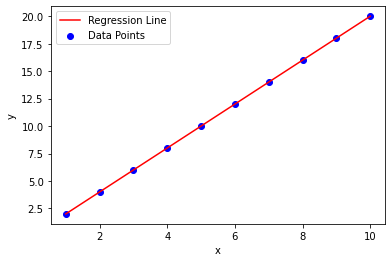

In [2]:
import matplotlib.pyplot as plt

# Data points
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Regression line (y = 2x)
k = 2
y_reg = [k * xi for xi in x]

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(x, y_reg, color='red', label='Regression Line')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Show the plot
plt.show()

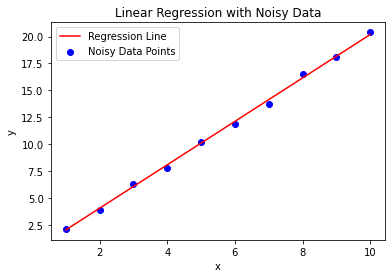

In [3]:
import matplotlib.pyplot as plt

# Data points with noise
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2.1, 3.9, 6.3, 7.8, 10.2, 11.9, 13.7, 16.5, 18.1, 20.4]

# Calculate k (slope of the regression line)
k = sum(xi*yi for xi, yi in zip(x, y)) / sum(xi**2 for xi in x)

# Calculate the regression line with noise
y_reg = [k * xi for xi in x]

# Plotting the data points with noise
plt.scatter(x, y, color='blue', label='Noisy Data Points')

# Plotting the regression line
plt.plot(x, y_reg, color='red', label='Regression Line')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Title for the plot
plt.title('Linear Regression with Noisy Data')

# Show the plot
plt.show()

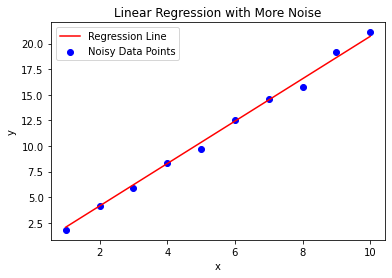

In [4]:
import matplotlib.pyplot as plt

# Data points with more noise
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1.8, 4.1, 5.9, 8.3, 9.7, 12.5, 14.6, 15.8, 19.2, 21.1]

# Calculate k (slope of the regression line)
k = sum(xi*yi for xi, yi in zip(x, y)) / sum(xi**2 for xi in x)

# Calculate the regression line with more noise
y_reg = [k * xi for xi in x]

# Plotting the data points with more noise
plt.scatter(x, y, color='blue', label='Noisy Data Points')

# Plotting the regression line
plt.plot(x, y_reg, color='red', label='Regression Line')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Title for the plot
plt.title('Linear Regression with More Noise')

# Show the plot
plt.show()

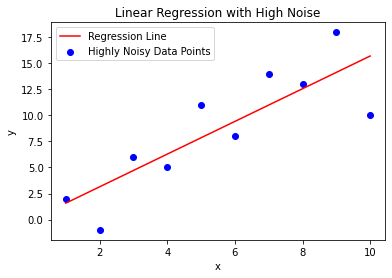

In [5]:
import matplotlib.pyplot as plt

# Data points with much more noise
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, -1, 6, 5, 11, 8, 14, 13, 18, 10]

# Calculate k (slope of the regression line)
k = sum(xi*yi for xi, yi in zip(x, y)) / sum(xi**2 for xi in x)

# Calculate the regression line with much more noise
y_reg = [k * xi for xi in x]

# Plotting the data points with much more noise
plt.scatter(x, y, color='blue', label='Highly Noisy Data Points')

# Plotting the regression line
plt.plot(x, y_reg, color='red', label='Regression Line')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Title for the plot
plt.title('Linear Regression with High Noise')

# Show the plot
plt.show()

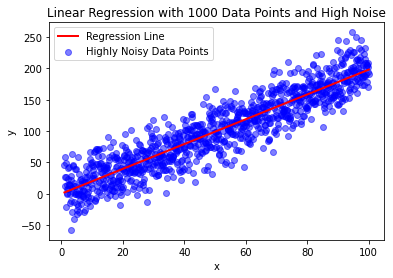

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(0)

# Generate 1000 data points for x
x = np.linspace(1, 100, 1000)

# Create a linear relationship (y = kx + noise)
true_k = 2
noise = np.random.normal(0, 25, size=x.shape)  # Generating noise with a larger standard deviation
y = true_k * x + noise

# Now let's calculate k using the formula again
k = np.sum(x * y) / np.sum(x**2)

# Generate the y values for the regression line
y_reg = k * x

# Plotting the data points with much more noise
plt.scatter(x, y, color='blue', alpha=0.5, label='Highly Noisy Data Points')

# Plotting the regression line
plt.plot(x, y_reg, color='red', linewidth=2, label='Regression Line')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Title for the plot
plt.title('Linear Regression with 1000 Data Points and High Noise')

# Show the plot
plt.show()
